# データを取得する

課題定義：Bostonの例題で決定木を用いて、住宅価格を予測することを目指す。この課題を解くことによって、基本的な機械学習の流れと、学習曲線、及びグリッドサーチについて理解を深めることができる。

In [698]:
# 必要モジュールの用意
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [699]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 取得データをDataFrameにする

In [700]:
# columnsにはload_boston().feature_namesを指定して、カラム名を指定します。
#もしくはインスタンス.feature_names
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# columnsには、'MEDV'を指定します。
y = pd.DataFrame(boston.target, columns=['MEDV'])
X.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [644]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# データ探索

## 基本的なデータ探索

In [645]:
X.sample(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
202,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
184,0.08308,0.0,2.46,0.0,0.4880,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
297,0.14103,0.0,13.92,0.0,0.4370,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
483,2.81838,0.0,18.10,0.0,0.5320,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
336,0.03427,0.0,5.19,0.0,0.5150,5.869,46.3,5.2311,5.0,224.0,20.2,396.90,9.80
442,5.66637,0.0,18.10,0.0,0.7400,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
260,0.54011,20.0,3.97,0.0,0.6470,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01


In [646]:
y.sample(20)

,MEDV
452,16.1
137,17.1
247,20.5
150,21.5
375,15.0
385,7.2
70,24.2
456,12.7
370,50.0
235,24.0


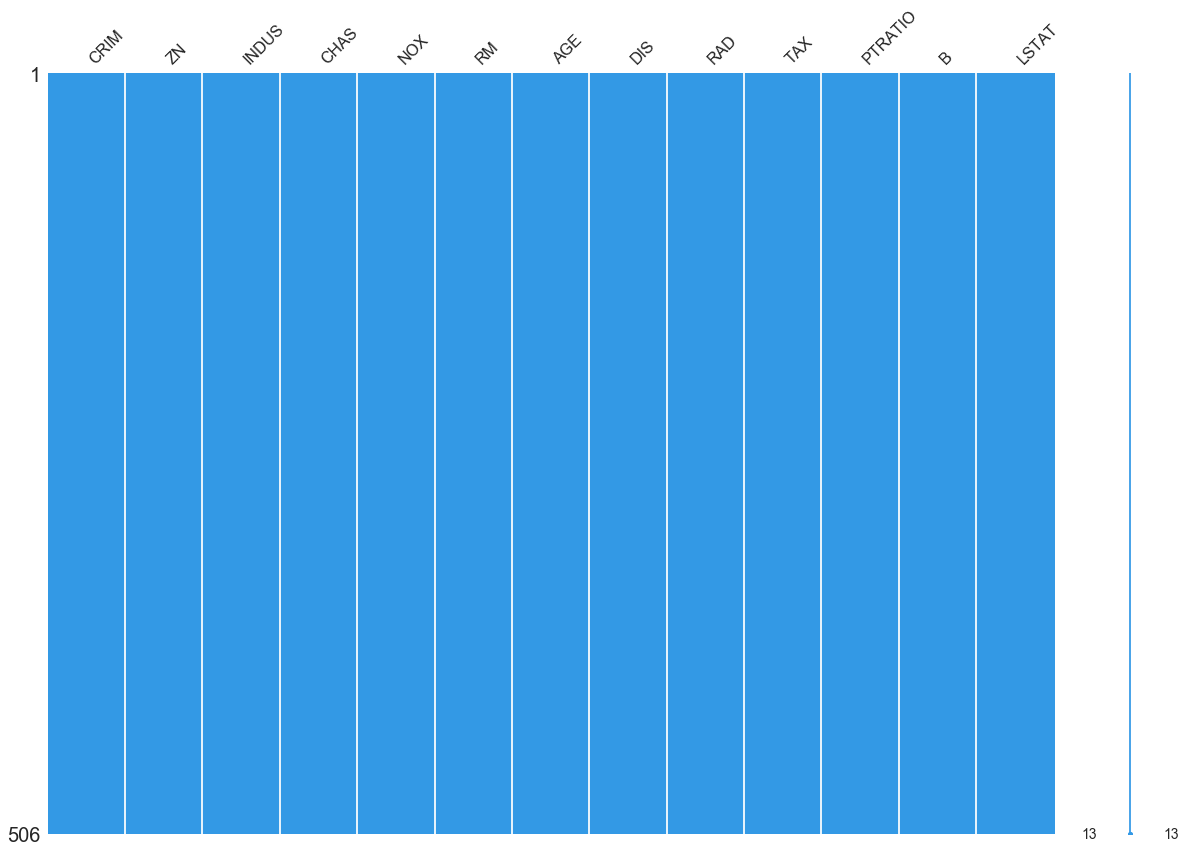

In [647]:
import missingno as msno
msno.matrix(df=X, figsize=(20,14), color=(0.2,0.6,0.9) )

## 基本的なデータ探索について記述せよ

データ探索、前処理、訓練、評価と分けると、
データ探索は、大きく分けて、以下のようなプロセスで進む。
1. データを捉える：データの全体像と特徴量の統計量について学ぶ
2. 欠損値の研究
3. 外れ値の研究


特に、describeを用いて統計量を掴み、head, tail, info, sample, isnull, valuecountsを使って中身を見つつも、欠損値を見ていくなどができるので、
文法を駆使してデータを眺め、理解を深められる。

ドメイン知識と呼ばれるが、業界知識だったり、専門知識も使えれば使う。
論文なども参照し、同じような問題があった場合、どのようにMethodを用いるかを理解しておきたい。



## 一変数の可視化

In [649]:
# 特徴量、カラムのデータタイプ、行列数と、その行が埋まっているか埋まっているかをチェックする
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [650]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [651]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
- why : 大気質改善活動へお金を払う意志があるかを調べる
- who : Harrison, D. and Rubinfeld, D.L.
- when : July 7, 1993
    
    
それぞれのカラムは何を表しているのか
- CRIM 犯罪発生率（人口単位）
- ZN 25,000平方フィート以上の住宅区画の割合
- INDUS 非小売業の土地面積の割合（人口単位）
- CHAS チャールズ川沿いかどうか（1:Yes、0:No）
- NOX 窒素酸化物の濃度（pphm単位）
- RM 1戸あたりの平均部屋数
- AGE 1940年よりも前に建てられた家屋の割合
- DIS ボストンの主な5つの雇用圏までの重み付きの距離
- RAD 幹線道路へのアクセス指数
- TAX 10,000ドルあたりの所得税率
- PTRATIO 教師あたりの生徒の数（人口単位）
- B アフリカ系アメリカ人居住者の割合（人口単位）
- LSTAT 低所得者の割合
- MEDV 住宅価格の中央値（単位 1,000ドル）

## describeメソッドを用いることで把握できたこと(考察)を記述せよ


前処理に関して気をつけるべき点は以下。

- 特徴量のスケールをみて必要に応じて、フィーチャースケーリングを行う。
- 最大最小を見て外れ値がある場合はそれをどうするか。（外れ値のまま処理するか、除外するか）
- 0データは値が０なのか計測できなかったから０なのか
- 機械学習の手法選択に活かせること
- 機械学習の特徴選択について考えられること
- データ量や特徴量の多さによって適切なモデルやハイパーパラメータを選択する。 （データや特徴量の個数が増えると計算量が膨大になるモデルは避ける）
- 外れ値や０の値が多い、スケールが異なる場合はそれに対応する前処理をしなくてはならないため前処理を検討するためにさらに分析に入るか、それともまずランダムフォレストなどで学習してみる


In [652]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 二変数の可視化

In [653]:
X_y = pd.concat([X, y], axis=1)
corr_matrix = X_y.corr()
corr_matrix['MEDV']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

## 二変数の可視化　相関

In [654]:
np.abs(corr_matrix['MEDV'])

CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

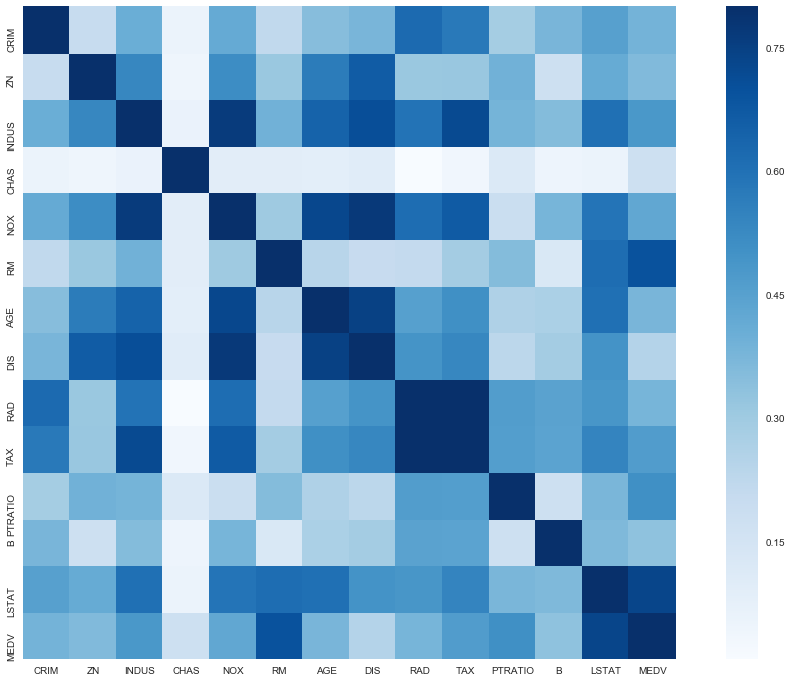

In [655]:
# 相関行列

f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(np.abs(corr_matrix), vmax=.8, cmap='Blues', square=True)

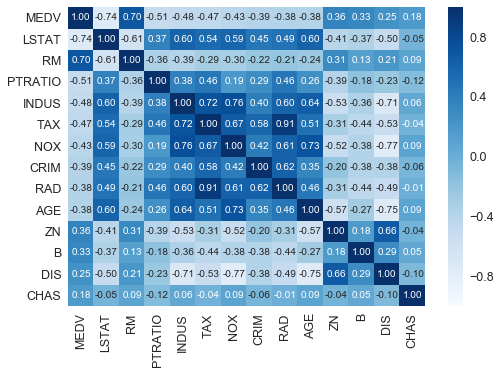

In [656]:
col_check = np.abs(corr_matrix).nlargest(10, 'MEDV')['MEDV'].index

k =15
# nlargest 大きい順にいくつかとる <->nsmallest 

cols = np.abs(corr_matrix).nlargest(k, 'MEDV')['MEDV'].index

# 相関係数が大きい順に10こ並べて、そのインデックスをcolsに代入　
cm = np.corrcoef(X_y[cols].values.T)

# 項目の名前のフォントを1.25倍する
sns.set(font_scale=1.25) 

hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', cmap='Blues', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## 二変数の可視化について記述せよ　相関


上の出力結果から、MEDVと最も相関が強いのは上から
- LSTAT
- RM
- PTRATIO

の３つとなる


## 相関の注意点について記述せよ

相関は外れ値があるときに、その影響を受けやすいため数値上相関があるように見えることがある。 
外れ値は散布図を見ることで確認することができ、 外れ値がある場合は外れ値を除外して相関を取ってみることで正しい相関を見ることができる。

### 最近の理解
相関については、議論が最近別れていると考える。
１０年ほど前までは、相関が特徴の両側から説明が効くことで便利であるが、因果関係を必ずしも表さないため、使いにくいとされ、
因果を探るためには注意が必要という取り扱いで、なるべく不必要な特徴は外すということがあった。

しかしながら機械学習においては、因果関係はなくとも、評価が高くできるのであれば、相関関係があればそれも必要なデータとして保持することができる。
つまりデータの保管や、計算環境が大きく変わったことで、相関を利用する方向に来ている。

因果はないかもしれないが、相関はあるので、データはより多く持っておこうというアプローチが機能するため、
ビジネスなどでデータ活用を主導する場合は、その時々において（予算も含めて）使い分けをしていきたい。


## 二変数の可視化　プロット

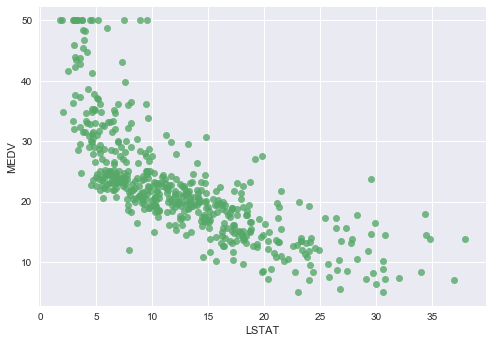

In [657]:
# 散布図
import seaborn as sns; sns.set(color_codes=True)
ax1 = sns.regplot(x="LSTAT", y="MEDV", data=X_y, fit_reg=False, color="g")

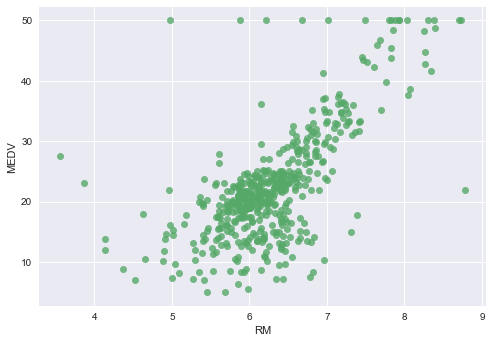

In [658]:
# 散布図
ax2 = sns.regplot(x="RM", y="MEDV", data=X_y, fit_reg=False, color="g")

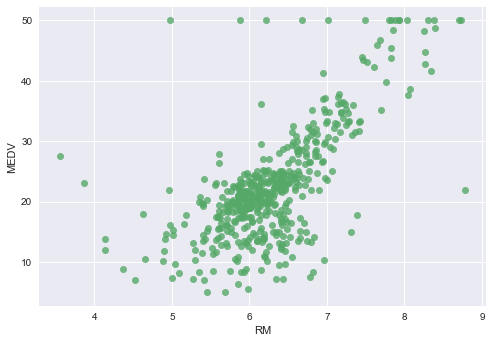

In [659]:
# 外れ値を外す
X_y = X_y[X_y['RM'] > -2]
ax2 = sns.regplot(x="RM", y="MEDV", data=X_y, fit_reg=False, color="g")

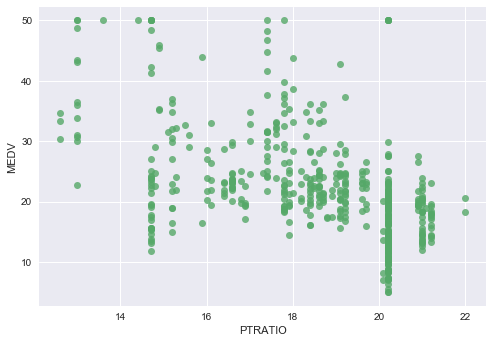

In [660]:
# 散布図
ax3 = sns.regplot(x="PTRATIO", y="MEDV", data=X_y, fit_reg=False, color="g")

## 二変数の可視化について記述せよ　プロット

LSTATは相関係数通り、左上から右下に向かって傾向が取れる。
RMも相関が高いといえる
PTRATIOは高い相関があるとは言えないが外れ値の研究の余地もあるかもしれない。

## データセット分割

In [709]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (404, 13)
X_test : (102, 13)
y_train : (404, 1)
y_test : (102, 1)


# 学習

## 決定係数

In [710]:
scores = []
max_depth = [1,2,3]
for i in max_depth:
    regressor = DecisionTreeRegressor(max_depth = i, random_state=0)
    regressor.fit(X_train, y_train)
    #R2Score
    score = regressor.score(X_test, y_test)
    scores.append(score)
print(scores)

[0.4065506603539385, 0.7436066708330533, 0.740931277984053]


## 学習曲線

In [711]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


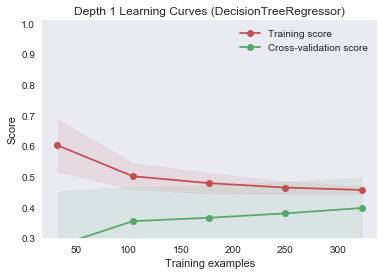

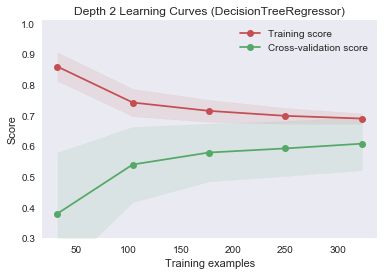

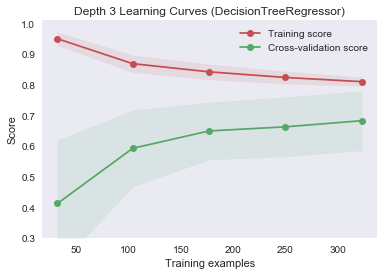

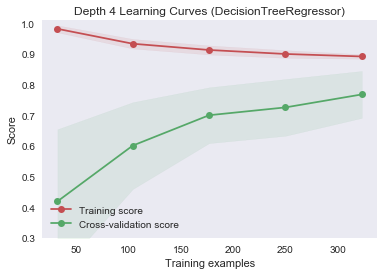

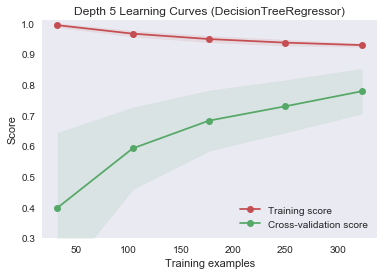

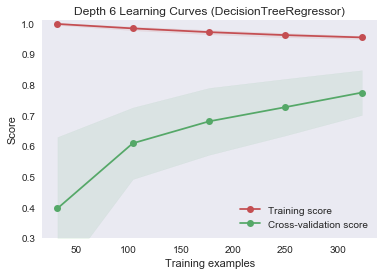

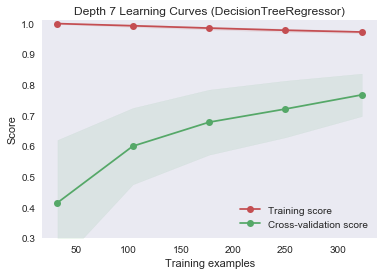

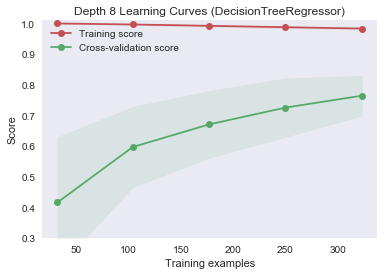

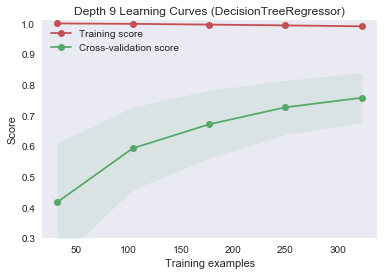

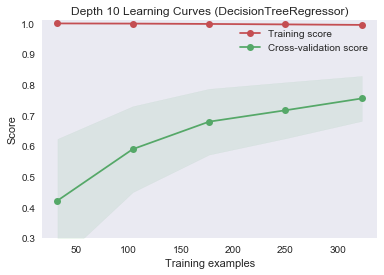

In [712]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, "Depth "+ str(degree) + " " +title, X_train, y_train, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
    


## 学習曲線について記述せよ

トレーニングデータのスコアだけがよくてクロスバリデーションの結果が良くない状態、つまり過学習している状態をHigh varianceという。

逆にhigh Biasとは未学習（underfitting）の状態でトレーニングデータ、クロスバリデーションのスコアどちらも高くない、
つまりそもそも学習できていない状態をいう。 


上記では
Depth1やDepth2のときはどちらの値も小さいのでhigh Bias状態になっていることが分かる。


学習曲線を見て深さ4が最もよいと判断できる。スコアの値がある程度高く、深さ４以上だとトレーニングデータとクロスバリデーションのスコアの開きがサンプルを大きくしても狭まっていないため過学習気味になっているためである。
深さ4では学習曲線を見てると、サンプル数を増やしていくと２つの曲線の差が更に縮まりクロスバリデーションのスコアが良くなると推測できる。


# グリッドサーチ

In [713]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#2から12まで2飛ばし
params = {"max_depth":  list(range(1,11)), "max_leaf_nodes": list(range(2, 12,2))}

regressor = DecisionTreeRegressor()
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
print(grid.fit(X_train,y_train))
print(grid.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_leaf_nodes': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)
{'max_depth': 6, 'max_leaf_nodes': 10}


## グリッドサーチについて記述せよ

グリッドサーチとは、ハイパーパラメータの探索空間を格子状 (グリッド) に区切り、交点となるハイパーパラメータの組み合わせについて、すべて調べるという方法。同じデータでハイパーパラメータを変えて学習しスコアを出しそれぞれを比較することで複数のハイパーパラメータの中から最適なパラメータを選択する手法。別の手法としてランダムサーチがある。 


グリッドサーチは与えられたパラメータの値をしらみつぶしに探索するのでその範囲の中で最適なパラメータが求められる反面計算量が多いという欠点がある。

ランダムサーチは与えられたパラメータの組み合わせをランダムで選んで比較を行うため計算量が少なく、よいパラメータのめどをさっと見つけるのに適している。


## グリッドサーチを使いこなそう

In [ ]:
Kfold数を３，５，１０それぞれで検証する。 評価方法を平均二乗誤差で実行。

In [817]:
for cv_num  in [3, 5, 10]:
    regressor = DecisionTreeRegressor(random_state=0)
    params = {"max_depth": list(range(4,7)), "max_leaf_nodes": list(range(2, 12,2))}
    scoring_fnc=make_scorer(r2_score)
    grid = GridSearchCV(estimator=regressor,param_grid=params, scoring='neg_mean_squared_error' ,cv=cv_num)
    grid.fit(X_train,y_train)
    
    print('cv {} : \nbest depth  {} \nbest score {}'.format(cv_num, grid.best_params_, grid.best_score_))

cv 3 : 
best depth  {'max_depth': 4, 'max_leaf_nodes': 10} 
best score -0.24979869480040132
cv 5 : 
best depth  {'max_depth': 4, 'max_leaf_nodes': 10} 
best score -0.2302822156625559
cv 10 : 
best depth  {'max_depth': 4, 'max_leaf_nodes': 10} 
best score -0.2037092228526906


結果はcv10のときに最小スコアが出て、深さ4となった。

# テスト

In [715]:
X_train1 = (X_train - X_train.mean() ) / X_train.std()
X_test1 = (X_test - X_test.mean() ) / X_test.std()
y_train = (y_train - y_train.mean() ) / y_train.std()
y_test = (y_test - y_test.mean() ) / y_test.std()

In [716]:
regressor = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8)
regressor.fit(X_train1, y_train)
print(regressor.score(X_test1, y_test))

0.8567302505256248


0.85が出たが、これが出るまで、データセット分割のところでrandom state= 0にしていたのが原因だった。

元のデータに大きく偏り（LSATで相関の高い分布）が見られたことから、ランダムにしなければ出ないことがわかった。





# 自学自習用（IsolationForest）

In [892]:
X2= X[['LSTAT']]
X2= X[['LSTAT']]
X2_y = pd.concat([X2, y], axis=1)
corr_matrix = X2_y.corr()
corr_matrix['MEDV']

LSTAT   -0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

In [911]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)

IsolationForest(contamination=0.90, max_features=1000.0,
       max_samples=4, n_estimators=1000, n_jobs=0, random_state=rng,
       verbose=0)

clf = IsolationForest()
clf.fit(X2)

mv_outliers = pd.DataFrame(clf.predict(X2))
mv_outliers.columns = ['OutlierFlag']

mv_outliers[mv_outliers == -1].count()

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


OutlierFlag    51
dtype: int64

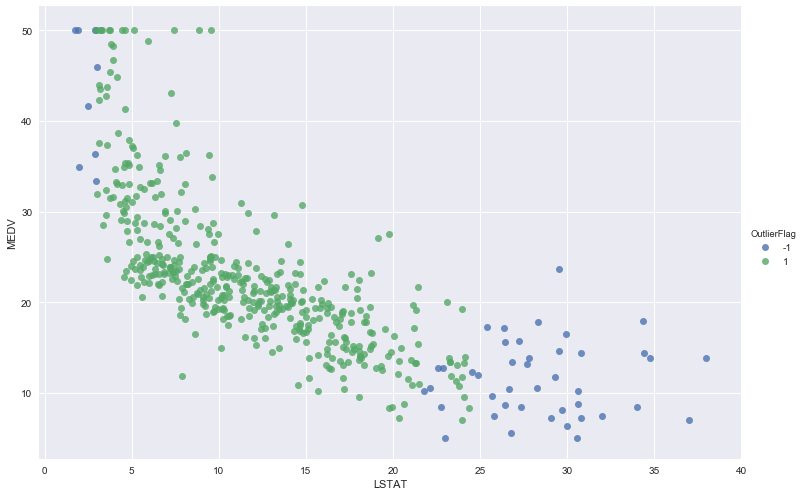

In [894]:
df_all_olcheck = pd.concat([mv_outliers, X2, y], axis=1)
ax = sns.lmplot(x='LSTAT', y='MEDV',fit_reg=False,
               data=df_all_olcheck, hue='OutlierFlag', size=7, aspect=1.5)

In [895]:
X3_y = X2_y[X2_y['LSTAT'] < 25]
#X3_y.iloc[377,:]
X3_y

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
5,5.21,28.7
6,12.43,22.9
7,19.15,27.1
9,17.10,18.9
10,20.45,15.0


In [896]:
corr_matrix = X3_y.corr()
corr_matrix['MEDV']

LSTAT   -0.750051
MEDV     1.000000
Name: MEDV, dtype: float64

多少相関係数上がった

In [897]:
y2 = X3_y['MEDV']

In [898]:
X3 = X3_y['LSTAT']

In [899]:
from sklearn.model_selection import train_test_split

X3_train , X3_test , y2_train , y2_test = train_test_split(X3, y2, test_size=0.2, random_state=1)
print("X3_train : {}".format(X3_train.shape))
print("X3_test : {}".format(X3_test.shape))
print("y2_train : {}".format(y2_train.shape))
print("y2_test : {}".format(y2_test.shape))

X3_train : (377,)
X3_test : (95,)
y2_train : (377,)
y2_test : (95,)


In [900]:
np.array(X3_train)
np.array(X3_test)
np.array(y2_train)
np.array(y2_test)

array([30.5, 22.1, 13.1, 19.1, 33.8, 36. , 26.4, 22.8, 19.6, 19.1, 24.8,
       22.6, 15.1, 33.1, 19.5, 19.7, 31.6,  8.5, 10.8, 13.4, 32.4, 24.3,
       28.7, 36.2, 20. , 21.4, 11.8, 26.4, 21.2, 23.5, 30.1, 16.7, 17.1,
       29. , 17.4, 21.1, 45.4, 24.3, 25. , 28.7, 23.7, 20.9, 19.3, 29. ,
       20.2, 32.5, 23.1, 21.1, 24.2, 23.2, 20.6, 13. , 31.7, 24.6, 22. ,
       25.1, 20.1, 20.1, 22.5, 12.7, 23.8, 13.5, 37.6, 19.9, 17.8, 50. ,
       36.1, 28.4,  8.3, 18.4, 19.5, 17. , 22. , 15. , 16.1, 17.1, 20.4,
       20.5, 25. , 20.2, 22.9, 11. , 21.7, 34.6, 13.3, 29.6, 26.7, 23. ,
       18.5, 16. , 16.1, 23.9, 21.7, 14. , 25. ])

In [901]:
X3_train = (X3_train - X3_train.mean() ) / X3_train.std()
X3_test = (X3_test - X3_test.mean() ) / X3_test.std()
y2_train = (y2_train - y2_train.mean() ) / y2_train.std()
y2_test = (y2_test - y2_test.mean() ) / y2_test.std()

In [902]:
X3_train = X3_train[:, np.newaxis]
X3_train.shape


(377, 1)

In [903]:
y2_train = y2_train[:, np.newaxis]
y2_train.shape

(377, 1)

In [904]:
X3_test = X3_test[:, np.newaxis]

In [905]:
y2_test = y2_test[:, np.newaxis]

In [906]:
regressor = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8)
regressor.fit(X3_train, y2_train)
print(regressor.score(X3_test, y2_test))

0.5487662561187394


In [ ]:
IsolationForestによって、相関をあげられることができた。あとは変数の設定等を適用していく。

$ R^2=1-\dfrac{\sum_{i=1}^n(y_i-f(x_i))^2}{\sum_{i=1}^n(y_i-\mu_Y)^2} $